# **1. Loading libraries and data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **2. Importing Dataset**

In [2]:
telechurn_data = pd.read_csv('/content/churn_data.csv')
telechurn_data.head(6)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [3]:
customer_data = pd.read_csv("/content/customer_data.csv")
customer_data.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No


In [4]:
internet_data = pd.read_csv("/content/internet_data.csv")
internet_data.head(6)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Yes,Fiber optic,No,No,Yes,No,Yes,Yes


# **Combining all data files into one consolidated dataframe**

In [5]:
# Merging on 'customerID'
df_1 = pd.merge(telechurn_data, customer_data, how='inner', on='customerID')

In [6]:
# Final dataframe with all predictor variables
df= pd.merge(df_1, internet_data, how='inner', on='customerID')

# **3. Undertanding the data**

In [7]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [10]:
df.columns.values

array(['customerID', 'tenure', 'PhoneService', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'], dtype=object)

In [11]:
df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object

In [12]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [13]:
df.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

# **4. Data Manipulation**

In [14]:
df = df.drop(['customerID'], axis = 1)
df.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [15]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [16]:
df[np.isnan(df['TotalCharges'])]

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
488,0,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,Female,0,Yes,Yes,No phone service,DSL,Yes,No,Yes,Yes,Yes,No
753,0,Yes,Two year,No,Mailed check,20.25,NaN,No,Male,0,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
936,0,Yes,Two year,No,Mailed check,80.85,NaN,No,Female,0,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes
1082,0,Yes,Two year,No,Mailed check,25.75,NaN,No,Male,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1340,0,No,Two year,No,Credit card (automatic),56.05,NaN,No,Female,0,Yes,Yes,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No
3331,0,Yes,Two year,No,Mailed check,19.85,NaN,No,Male,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3826,0,Yes,Two year,No,Mailed check,25.35,NaN,No,Male,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4380,0,Yes,Two year,No,Mailed check,20.00,NaN,No,Female,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5218,0,Yes,One year,Yes,Mailed check,19.70,NaN,No,Male,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
6670,0,Yes,Two year,No,Mailed check,73.35,NaN,No,Female,0,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No


In [17]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [18]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [19]:
df.fillna(df["TotalCharges"].mean())

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Male,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [20]:
df.isnull().sum()

tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [21]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,No,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,No,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,No,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,No,No,No,No,Fiber optic,No,No,No,No,No,No


In [22]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [23]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# **5. Data Visualization**

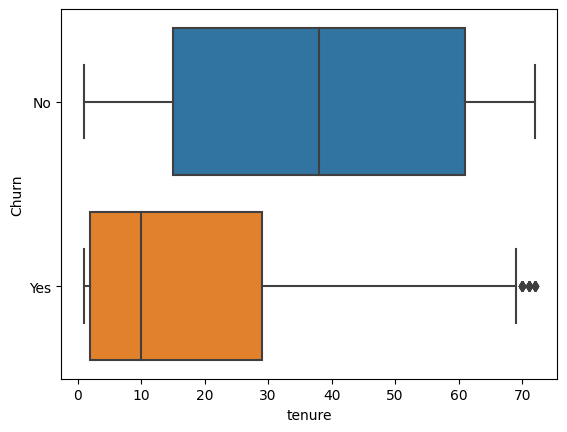

In [24]:
sns.boxplot(x = 'tenure', y = 'Churn', data = df)
plt.show()

<BarContainer object of 7032 artists>

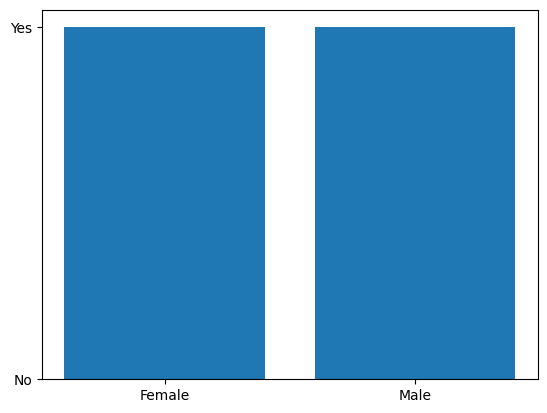

In [25]:
plt.bar(df['gender'],df['Churn'])

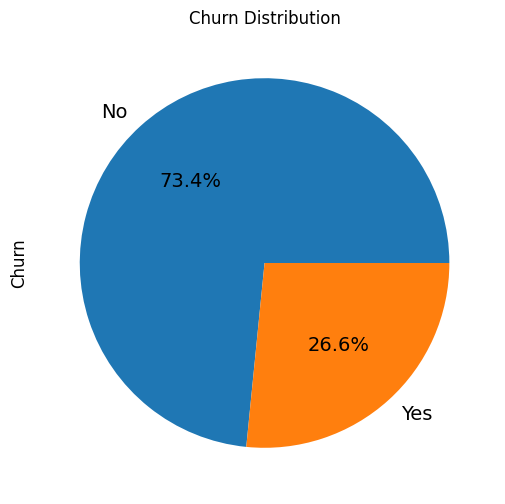

In [26]:
pie_chart =df['Churn'].value_counts()*100.0 /len(df)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

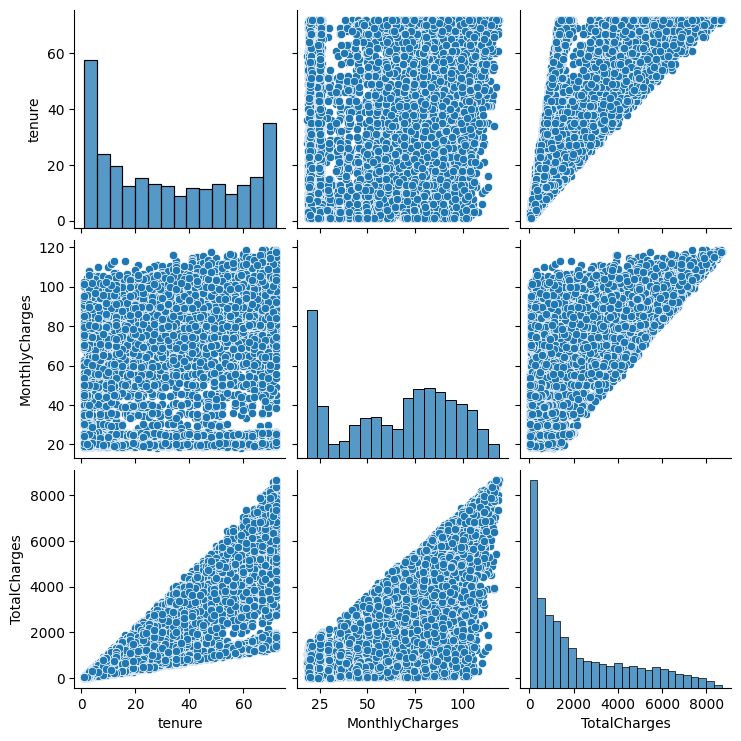

In [27]:
sns.pairplot(df)

In [28]:
#Removing gender,tenure,customerId they are not usefull
col = ['gender','tenure']
df = df.drop(col,axis = 1)

In [29]:
df.head()

,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,Yes,One year,No,Mailed check,56.95,1889.50,No,No,No,No,No,DSL,Yes,No,Yes,No,No,No
2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,No,No,No,DSL,Yes,Yes,No,No,No,No
3,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,No,No,No,Fiber optic,No,No,No,No,No,No


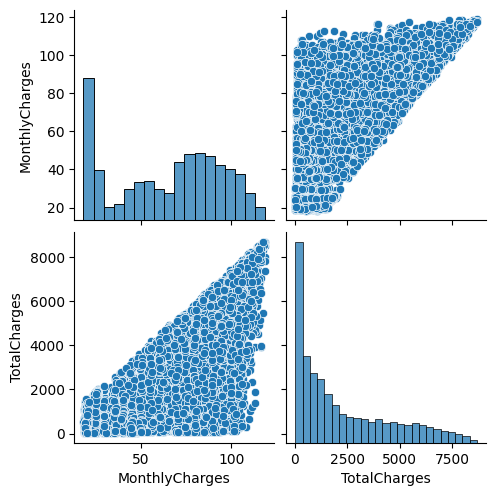

In [30]:
sns.pairplot(df)

# **Total Charges**

In [31]:
df['TotalCharges'].notnull().sum()

7032

In [32]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [33]:
df['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [35]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
value = (df['TotalCharges']/df['MonthlyCharges']).median()*df['MonthlyCharges']
df['TotalCharges'] = value.where(df['TotalCharges'] == np.nan, other =df['TotalCharges'])

In [34]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [36]:
df.notnull().sum()

PhoneService        7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
dtype: int64

In [37]:
df.isnull().sum()

PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [38]:
df['Churn'].describe()

count     7032
unique       2
top         No
freq      5163
Name: Churn, dtype: object

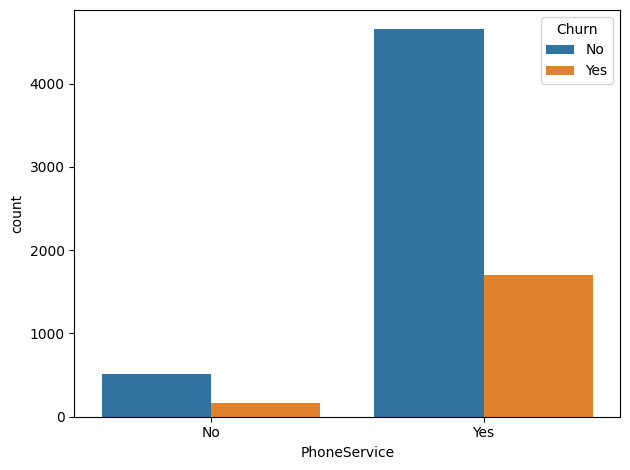

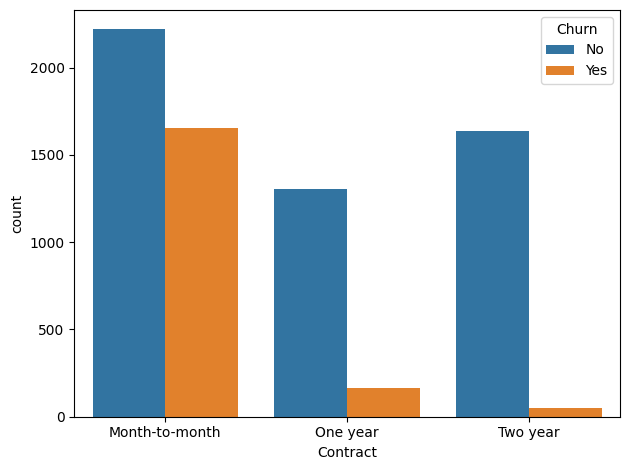

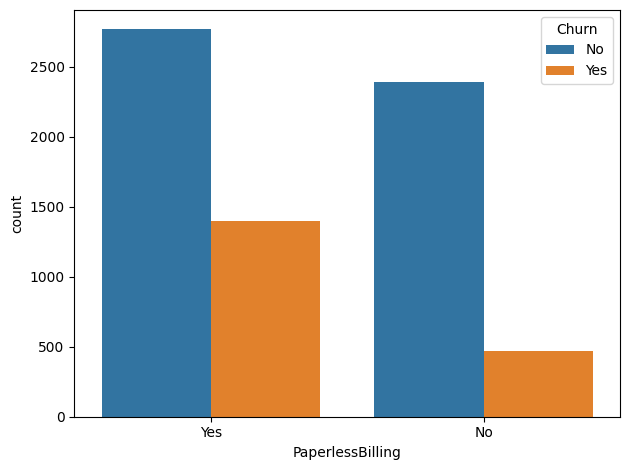

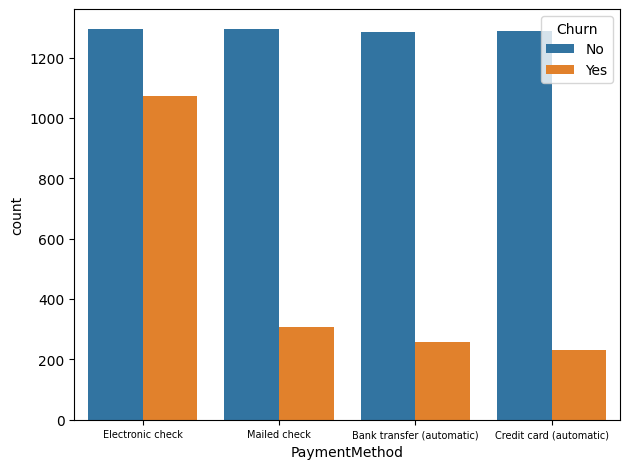

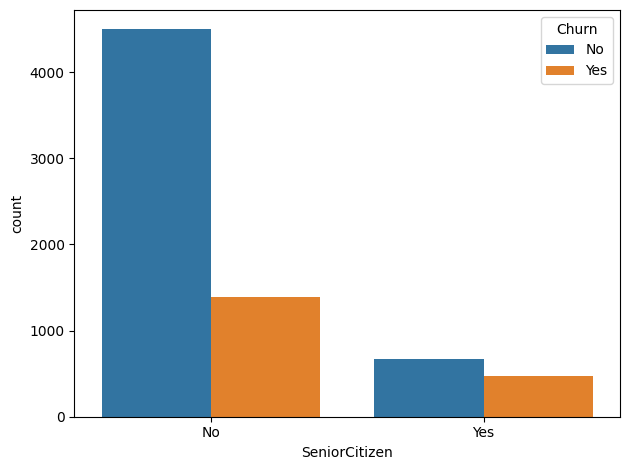

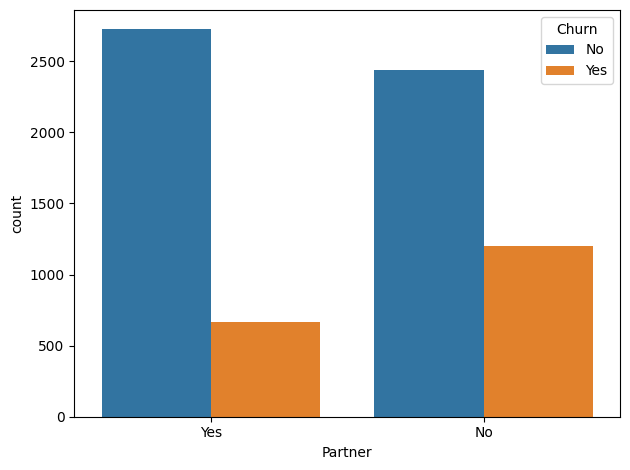

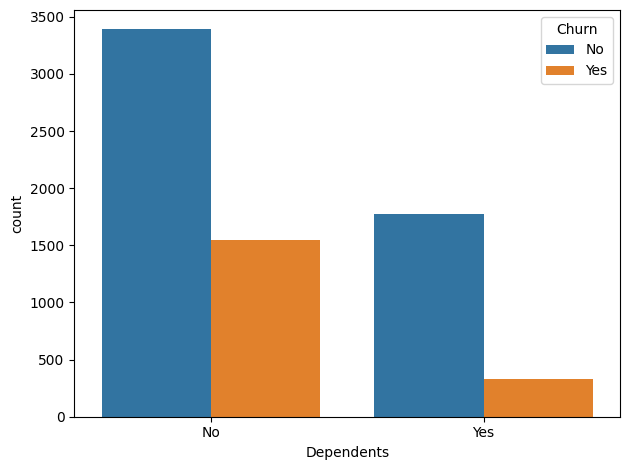

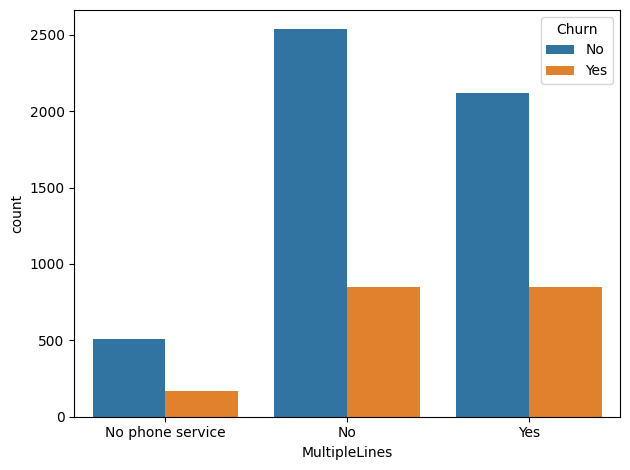

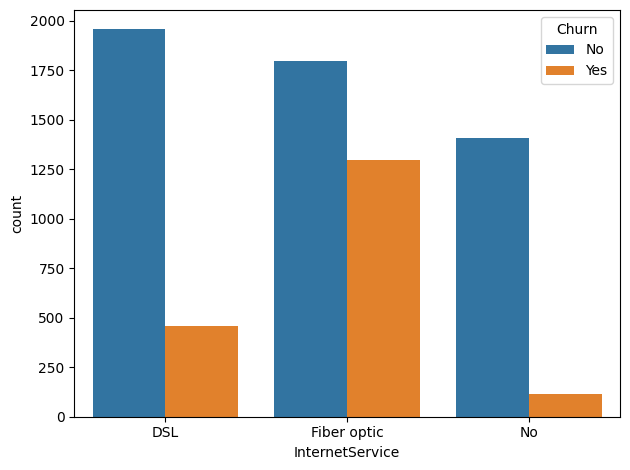

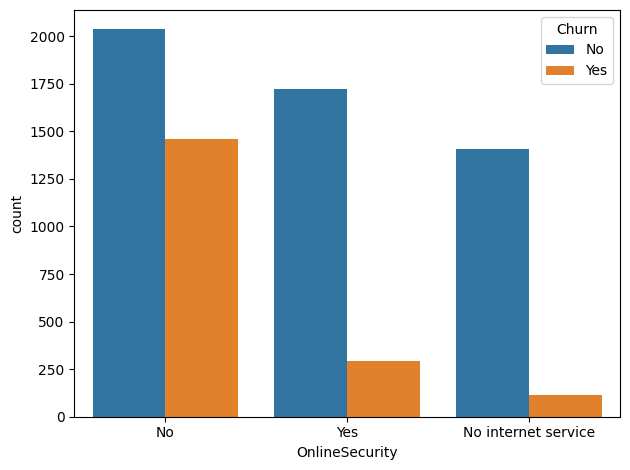

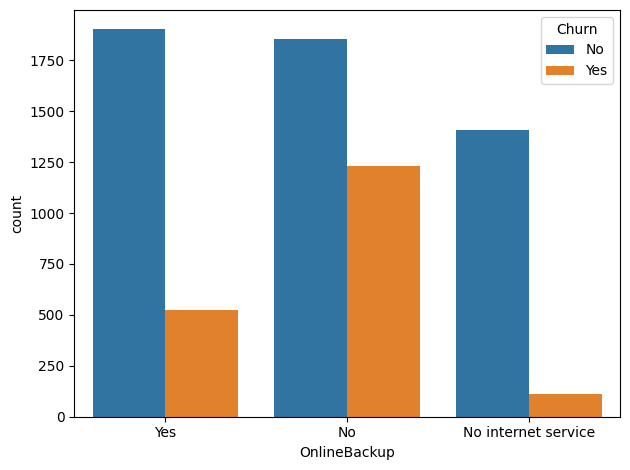

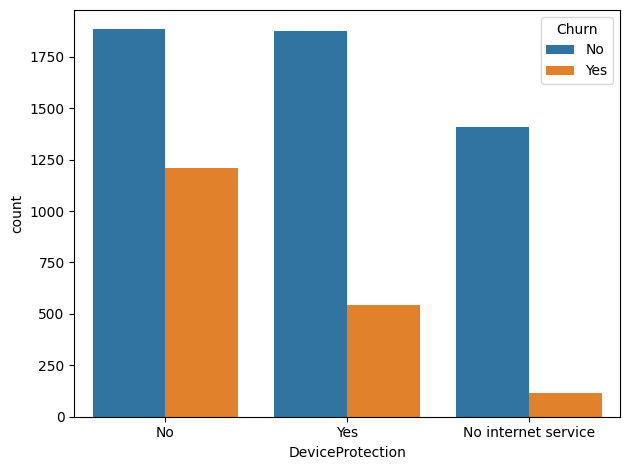

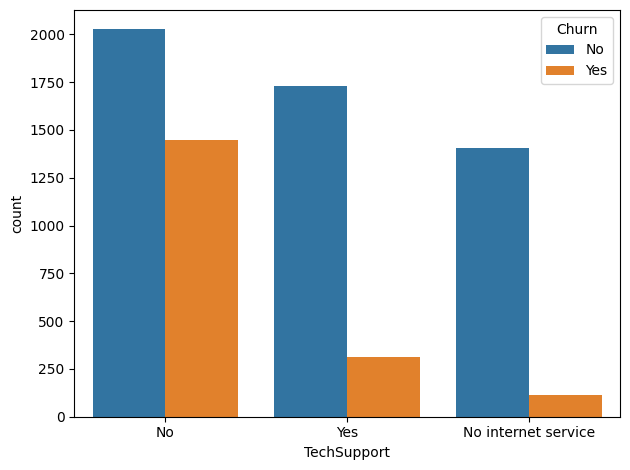

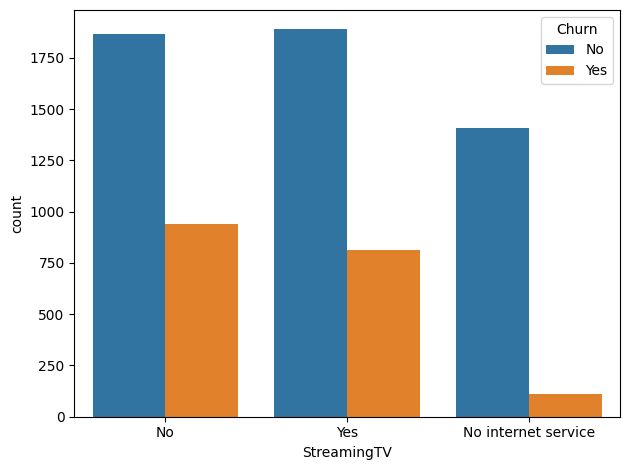

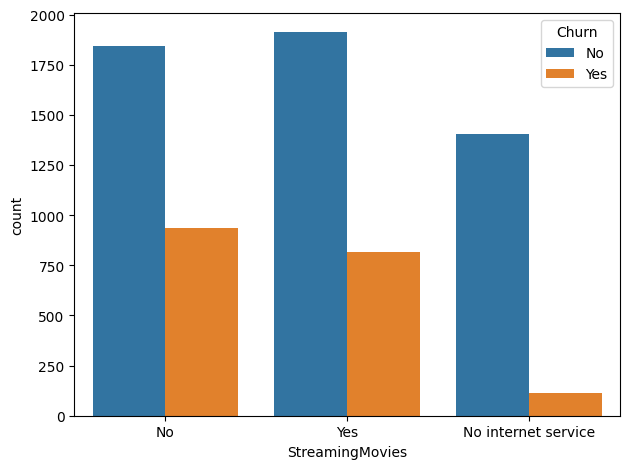

In [39]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
  ax = sns.countplot(data =df, x = predictor, hue='Churn')
  if predictor == "PaymentMethod":
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
    plt.tight_layout()
    plt.show()
  else:
    plt.tight_layout()
    plt.show()

# **Converting some binary variables (Yes/No) to 0/1**

In [40]:
#converting Yes as 1 and No as 0
df["Churn"].replace(['Yes','No'],[1,0])

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [41]:
df

,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,Yes,One year,No,Mailed check,56.95,1889.50,No,No,No,No,No,DSL,Yes,No,Yes,No,No,No
2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,No,No,No,DSL,Yes,Yes,No,No,No,No
3,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,One year,Yes,Mailed check,84.80,1990.50,No,No,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,No,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,Yes,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Yes,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


**creating dummy features**

In [42]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,29.85,29.85,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,56.95,1889.50,0,1,0,1,0,1,0,0,...,1,1,0,0,1,0,0,1,0,0
2,53.85,108.15,0,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,42.30,1840.75,1,0,0,1,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
4,70.70,151.65,0,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [43]:
df_dummies.describe()

,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,0.096701,0.903299,0.551052,0.209329,0.239619,0.407281,0.592719,0.219283,...,0.343857,0.493743,0.216155,0.290102,0.399460,0.216155,0.384386,0.395478,0.216155,0.388367
std,30.085974,2266.771362,0.295571,0.295571,0.497422,0.406858,0.426881,0.491363,0.491363,0.413790,...,0.475028,0.499996,0.411650,0.453842,0.489822,0.411650,0.486484,0.488988,0.411650,0.487414
min,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.587500,401.450000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.350000,1397.475000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,89.862500,3794.737500,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Checking Correlation between all the Data

<Axes: >

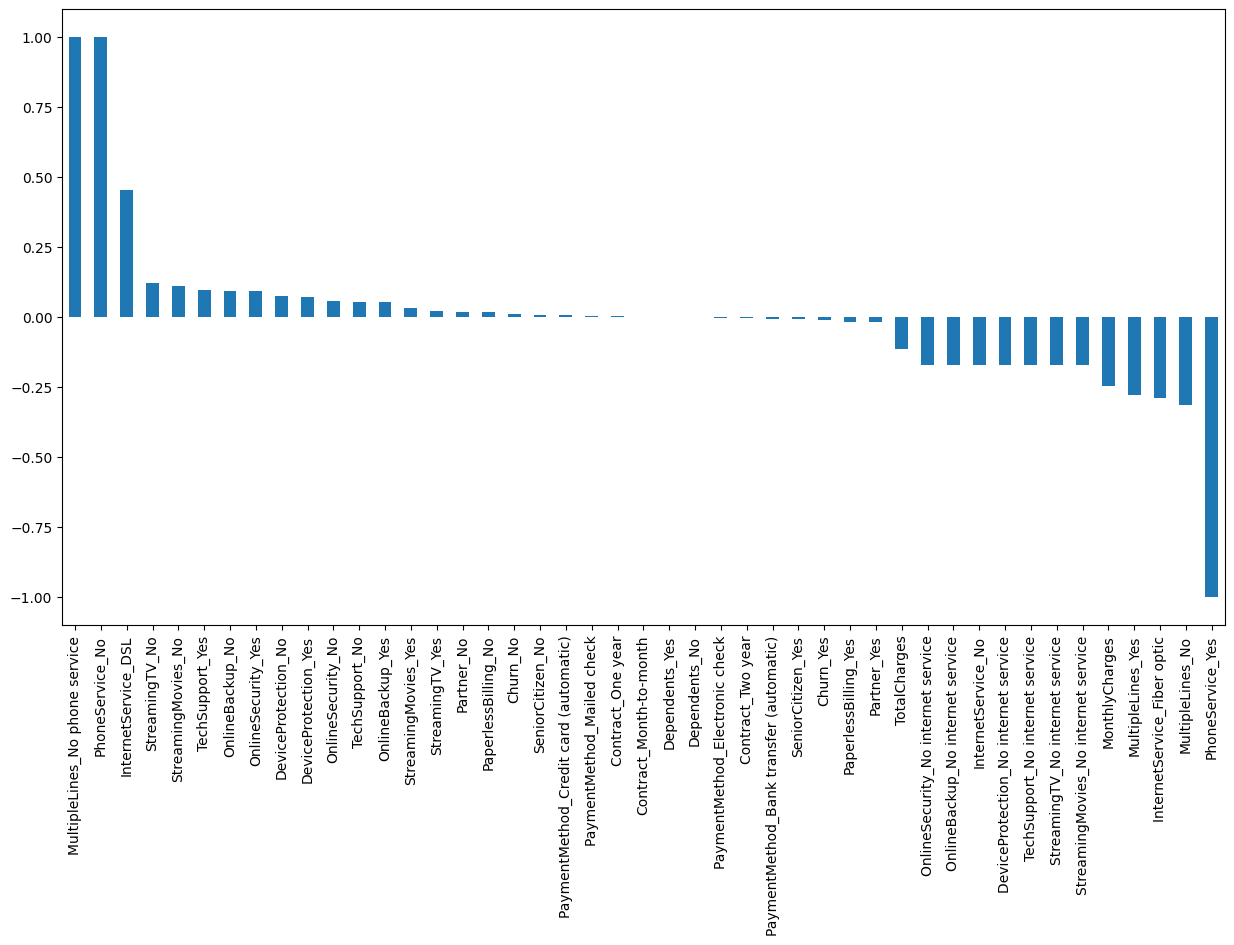

In [44]:
plt.figure(figsize=(15,8))
df_dummies.corr()['PhoneService_No'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

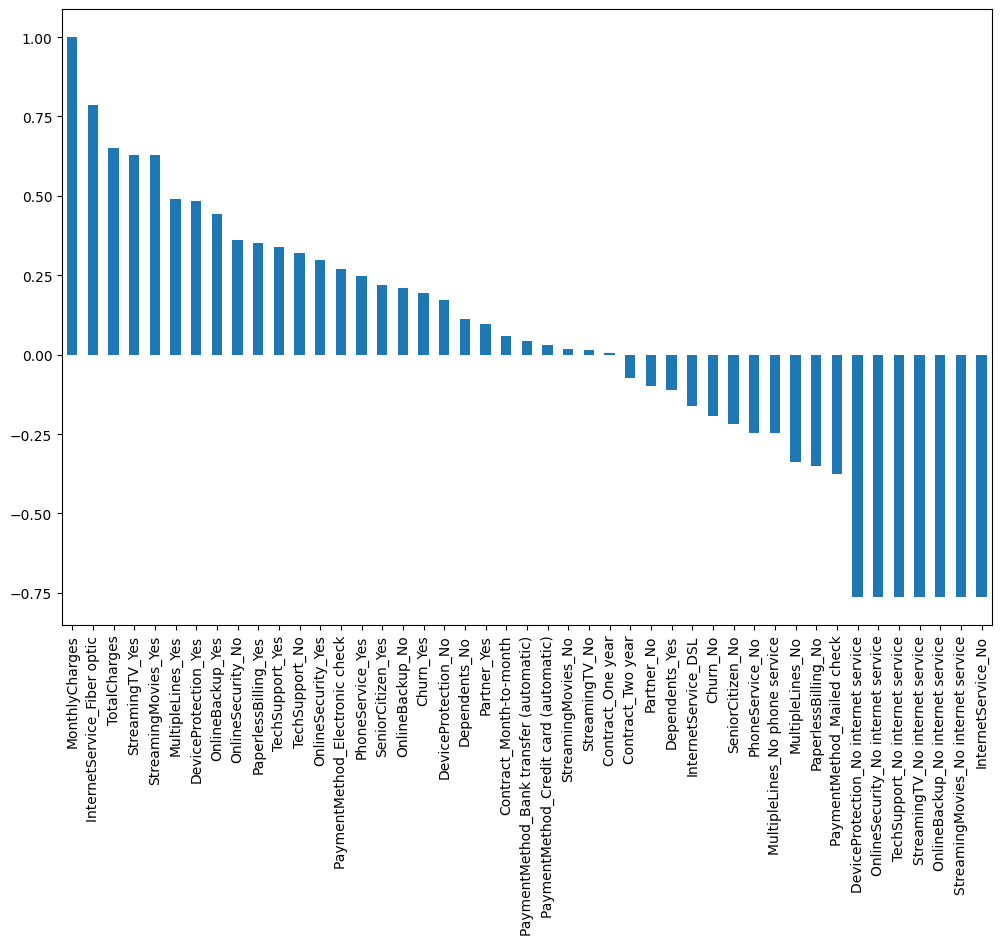

In [45]:
df_dummies.corr()['MonthlyCharges'].sort_values(ascending = False).plot(kind='bar',figsize = (12,8))

In [46]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Text(0.5, 1.0, '% of Senior citizen')

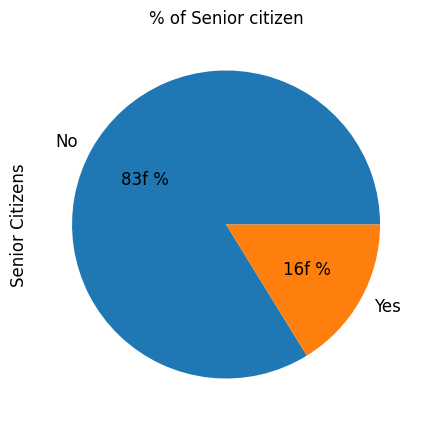

In [47]:
from matplotlib.axes import mticker
ax = (customer_data['SeniorCitizen'].value_counts()*100.0 /len(customer_data))\
.plot.pie(autopct='%.if %%', labels = ['No','Yes'],figsize =(5,5), fontsize = 12)
ax.yaxis.set_major_formatter(mticker.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior citizen',fontsize = 12)

Text(0.5, 1.0, '# of Customers by Partner')

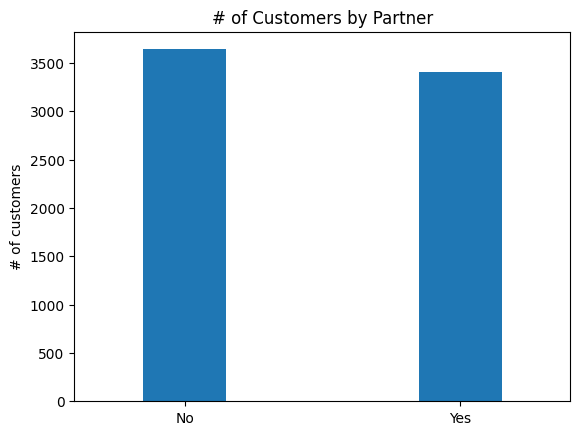

In [48]:
ax = customer_data['Partner'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of customers')
ax.set_title('# of Customers by Partner')